# Project Title: Netflix Movie and TV Show Data Analysis
# Goal: Explore Netflix’s content library by type, genre and country-based distribution.

Key Questions to Explore:

1.What’s the distribution between movies and TV shows?

2.Which countries have the most Netflix content?

3.How has the number of Netflix releases changed over the years?

4.What are the most common genres on Netflix?

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step-1: Get the data

In [6]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Step-2: Preview the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Step-3: Data cleaning
Handle missing values, format dates and extract useful columns

In [31]:
# Convert date_added column to datetime object
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
df['date_added'].isnull().sum()

98

In [49]:
# Drop rows with missing values
df = df.dropna(subset=['date_added']).copy()

In [51]:
df['date_added'].isnull().sum()

0

In [53]:
# Extract year and month
df.loc[:,'year_added'] = df['date_added'].dt.year
df.loc[:,'month_added'] = df['date_added'].dt.month

In [63]:
# Fill missing values
df['country'].fillna('Unknown')
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')
df['rating'].fillna('Unknown')
df['duration'].fillna('Unknown')

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8709, dtype: object

# Step-4: Exploratory Data Analysis(EDA)

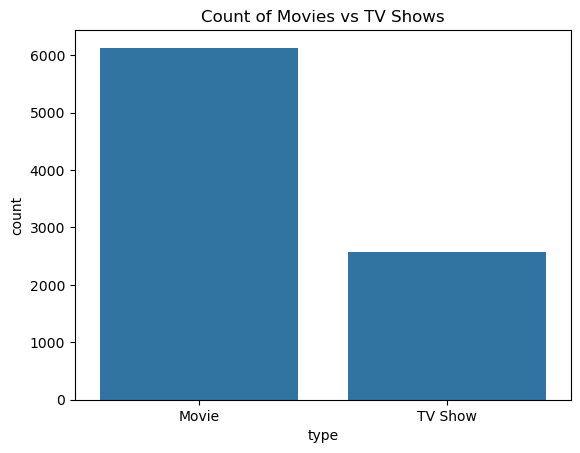

In [72]:
# 1. Movies vs TV Shows Count
sns.countplot(data=df,x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()

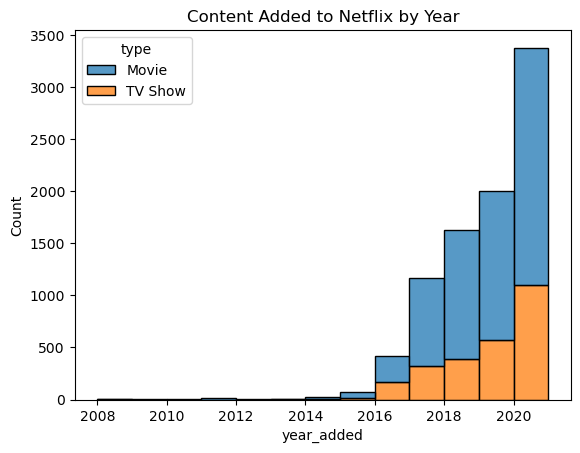

In [74]:
# 2. Contents added to Netflix over the years
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', binwidth=1)
plt.title('Content Added to Netflix by Year')
plt.show()


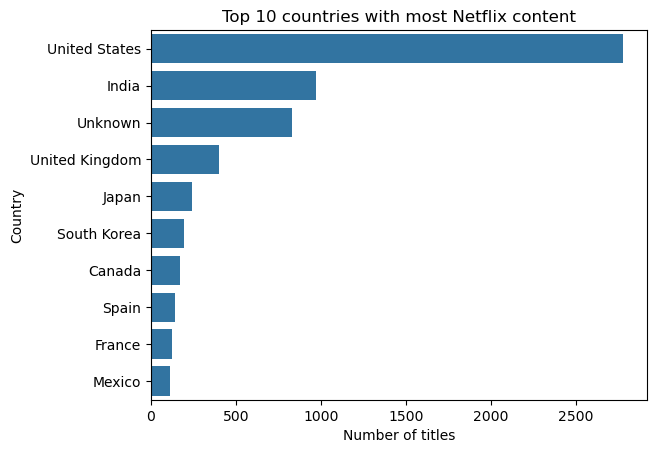

In [82]:
# 3. Countries having most Netflix content
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index,x=top_countries.values)
plt.title('Top 10 countries with most Netflix content')
plt.xlabel('Number of titles')
plt.ylabel('Country')
plt.show()

In [84]:
# 4. Most common genres on Netflix
from collections import Counter

# Many entries have multiple genres separated by commas
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = []
for sublist in genres:
    for genre in sublist:
        flat_genres.append(genre)
top_genres = Counter(flat_genres).most_common(10)
top_genres

[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1328),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('Independent Movies', 756),
 ('TV Dramas', 739),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616)]

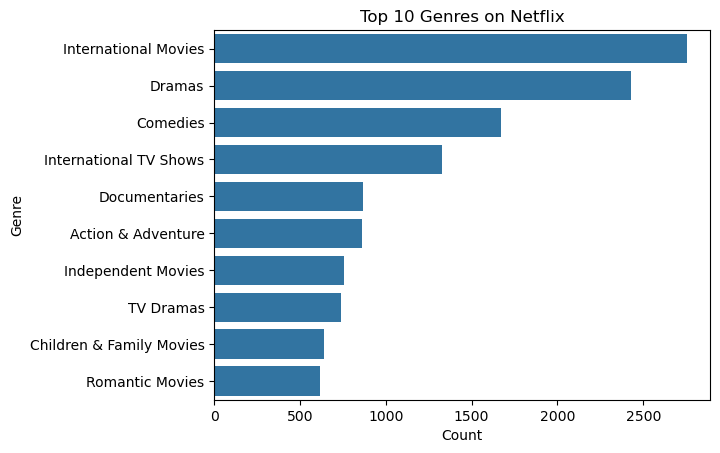

In [86]:
genres_df = pd.DataFrame(top_genres,columns=['Genre','Count'])
sns.barplot(data=genres_df,x='Count',y='Genre')
plt.title('Top 10 Genres on Netflix')
plt.show()

## Insights from Netflix Data Analysis
1. The majority of content on Netflix are **Movies**, making up over 70% of the total.
2. **2018 to 2020** saw the highest content additions on the platform.
3. **USA** has the highest number of Netflix titles, followed by **India** and **United Kingdom**.
4. Most common genre is **International Movies**, followed by **Dramas** and **Comedies**.